In [512]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline


## Данные по курсам и видеолекциям актуальны на 31 марта 2020 года
### Для того чтобы обновить данные, необходимо воспользоваться утилитой сбора и парсинга данных на Selenium

In [184]:
courses = pd.read_csv("data/courses_data_extended.csv") 
# Вывести первые 5 строк из CSV файла
print("Data Shape:", courses.shape)
print("Column types:", courses.dtypes)
courses.head()

Data Shape: (91, 16)
Column types: course_name           object
course_name_length    int64 
course_url            object
course_rating         object
course_enrolled       object
rating                object
reviews               object
course_views          object
course_hours          int64 
course_category       object
course_discipline     object
num_of_weeks          int64 
course_level          object
course_language       object
course_videos         int64 
course_teachers       int64 
dtype: object


,course_name,course_name_length,course_url,course_rating,course_enrolled,rating,reviews,course_views,course_hours,course_category,course_discipline,num_of_weeks,course_level,course_language,course_videos,course_teachers
0,Practical Reinforcement Learning,32,https://www.coursera.org/learn/practical-rl,4.1,25426,315,86,54364,38,Data Science,Machine Learning,6,Advanced,English,55,2
1,Макроэкономика (Macroeconomics),31,https://www.coursera.org/learn/makrojekonomika,4.9,19589,383,39,52982,31,Social Sciences,Economics,10,Beginner,Russian,67,1
2,Introduction to Neuroeconomics: How the Brain Makes Decisions,61,https://www.coursera.org/learn/neuroeconomics,4.7,82329,1161,239,84758,18,Social Sciences,Economics,9,Beginner,English,50,1
3,Линейная алгебра (Linear Algebra),33,https://www.coursera.org/learn/algebra-lineynaya,4.5,22339,271,50,34765,39,Math and Logic,Math and Logic,11,Beginner,Russian,55,1
4,"Инфраструктура рынка, методы и технологии инвестирования",56,https://www.coursera.org/learn/infrastruktura-rynka,4.3,4895,72,11,6040,12,Business,Finance,4,Beginner,Russian,28,1


## Статистика по курсам ВШЭ

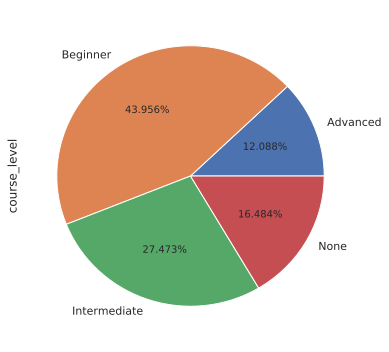

In [408]:
difficulty_data_count = courses.groupby('course_level')['course_level'].count()
difficulty_data_count
bar_categories = difficulty_data_count.plot.pie(y='Distribution', figsize=(6, 6), autopct='%.03f%%')

course_teachers
1    58
2    14
3    8 
4    4 
5    5 
6    1 
7    1 
Name: course_teachers, dtype: int64


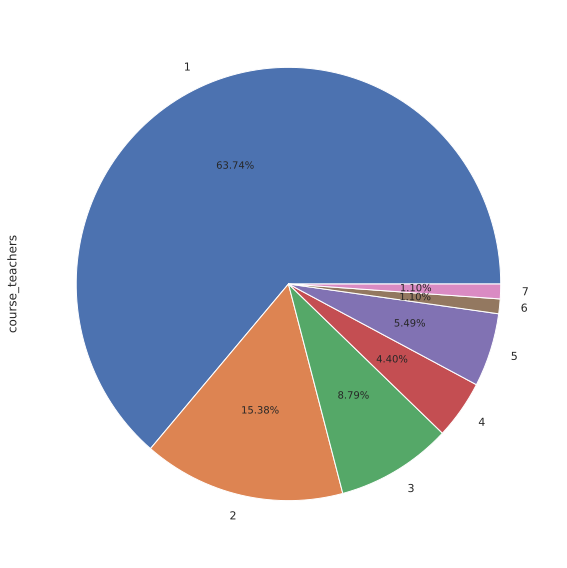

In [413]:
teachers_data_count = courses.groupby('course_teachers')['course_teachers'].count()
print(teachers_data_count)
pie_categories = teachers_data_count.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.tight_layout()

In [235]:
language_data_mean = courses.groupby('course_language').mean()
language_data_mean

,course_name_length,course_hours,num_of_weeks,course_videos,course_teachers
course_language,,,,,
English,44.558824,26.352941,7.617647,62.058824,1.617647
Russian,42.684211,24.228070,7.719298,61.438596,1.912281


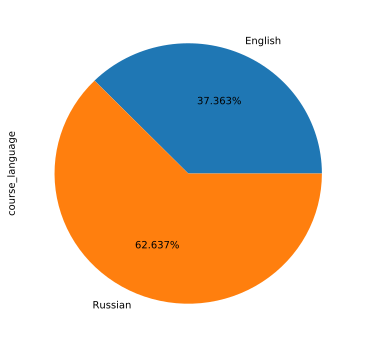

In [244]:
language_data_count = courses.groupby('course_language')['course_language'].count()
language_data_count
bar_categories = language_data_count.plot.pie(y='Distribution', figsize=(6, 6), autopct='%.03f%%')


In [189]:
categories_data_mean = courses.groupby('course_category').mean()
categories_data_mean

,course_name_length,course_hours,num_of_weeks,course_videos,course_teachers
course_category,,,,,
Arts and Humanities,45.500000,23.000000,9.500000,70.666667,1.333333
Business,42.250000,19.850000,5.600000,41.700000,2.250000
Computer Science,46.333333,28.444444,7.555556,61.222222,1.222222
Data Science,40.250000,36.875000,6.125000,55.125000,2.875000
Language Learning,100.000000,18.000000,6.000000,31.000000,1.000000
Math and Logic,36.916667,29.666667,8.333333,69.666667,1.583333
Personal Development,66.500000,5.000000,2.500000,29.000000,2.000000
Physical Science and Engineering,42.500000,38.500000,11.000000,79.000000,1.500000
Social Sciences,42.280000,23.680000,8.920000,74.200000,1.680000


course_category
Arts and Humanities                 12
Business                            20
Computer Science                    9 
Data Science                        8 
Language Learning                   1 
Math and Logic                      12
Personal Development                2 
Physical Science and Engineering    2 
Social Sciences                     25
Name: course_category, dtype: int64


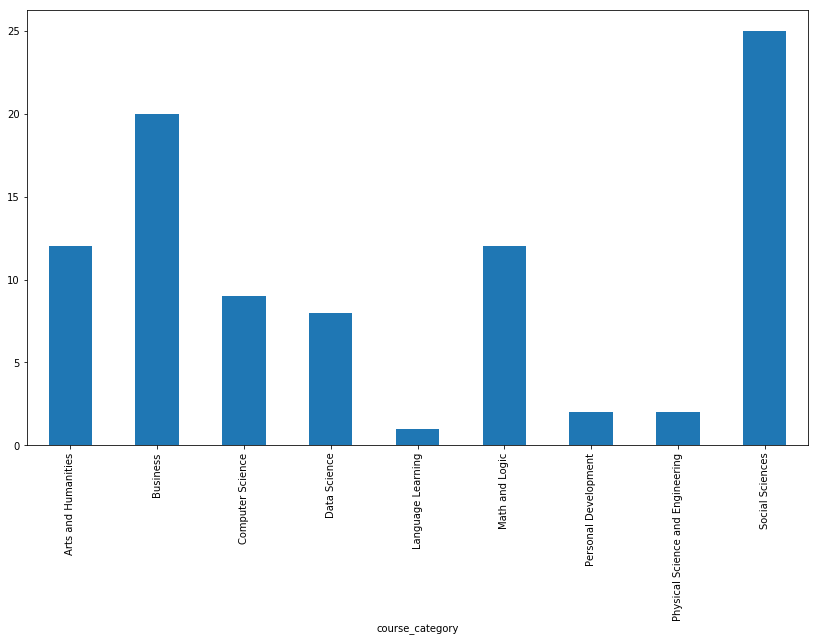

In [199]:
categories_data_count = courses.groupby('course_category')['course_category'].count()
print(categories_data_count)
bar_categories = categories_data_count.plot.bar(y='Distribution', figsize=(14, 8))


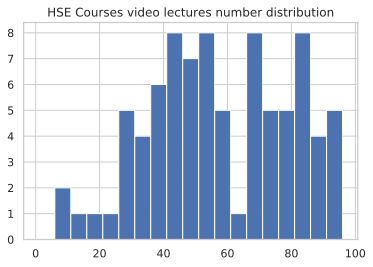

In [295]:
a = np.array(courses['course_videos']) 
plt.hist(a, bins = [i for i in range(1, 100, 5)]) 
plt.title("HSE Courses video lectures number distribution") 
plt.show()

course_rating
3.8     3 
3.9     2 
4.1     2 
4.3     3 
4.4     4 
4.5     12
4.6     17
4.7     14
4.8     15
4.9     11
5       1 
None    7 
Name: course_rating, dtype: int64


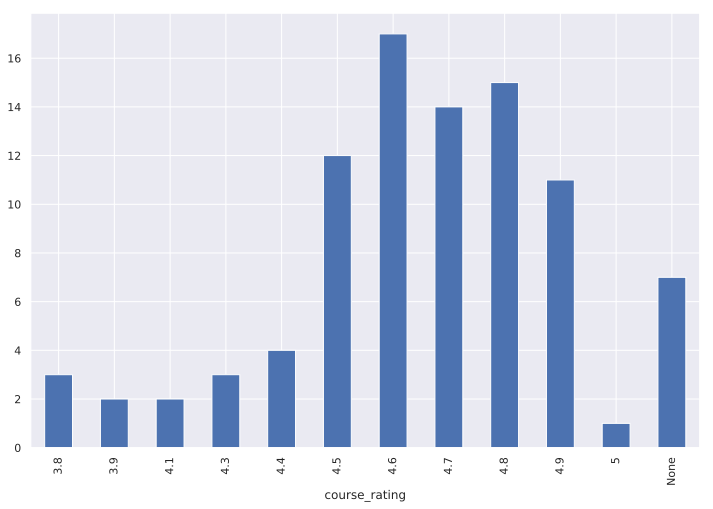

In [405]:
rating_data_mean = courses.groupby('course_rating')['course_rating'].count()
print(rating_data_mean)
bar_categories = rating_data_mean.plot.bar(y='Distribution', figsize=(12, 8))

Total course personnel: 164
164


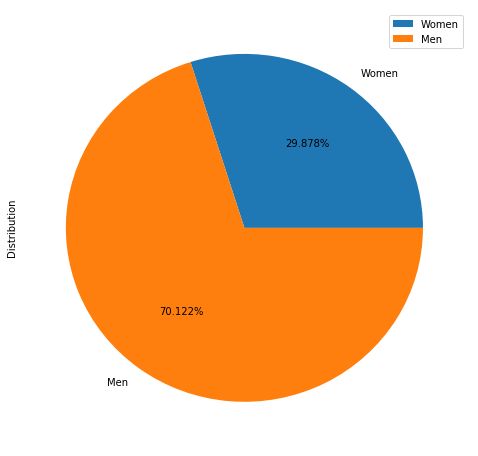

In [186]:
# Распределение занятых преподавателей, приглашенных лекторов и ассистентов в курсах ВШЭ по полу 

total = courses["course_teachers"].sum()
print("Total course personnel:", total)
women = 49
men = 115
print(women + men)
df = pd.DataFrame({'Distribution': [women / total, men / total]},

                  index=['Women', 'Men'])

plot = df.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.03f%%')

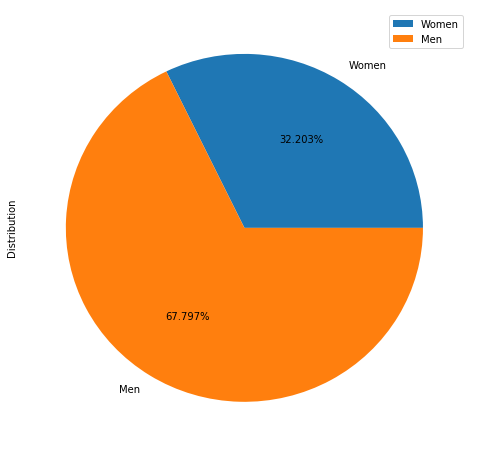

In [167]:
# Распределение лекторов курсов по полу, в случае когда курс ведет только 1 человек

men = 40
women = 19
total = men + women

df = pd.DataFrame({'Distribution': [women / total, men / total]},

                  index=['Women', 'Men'])

plot = df.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.03f%%')

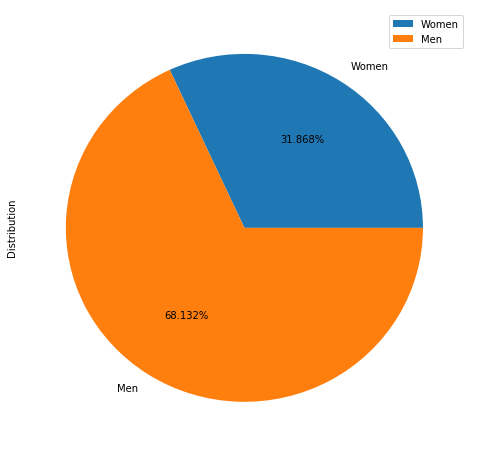

In [168]:
# Гендерное распределение курсов ВШЭ. 1 балл добавляется если среди преподавателей
# курса преобладают мужчины или женщины соответсвенно. Если кол-во мужчин = кол-во женщин, 1 балл добавляется женщинам. 

men = 62
women = 29

total = men + women

df = pd.DataFrame({'Distribution': [women / total, men / total]},

                  index=['Women', 'Men'])

plot = df.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.03f%%')

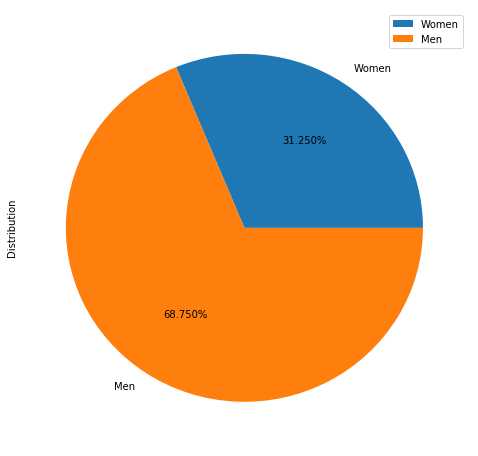

In [169]:
# Гендерное распределение, в случае когда курс ведут несколько преподавателей. Видно что примерно в 1 из 3 курсов, среди
# 32 преобладают преподаватели женского пола

men = 22
women = 10

total = men + women

df = pd.DataFrame({'Distribution': [women / total, men / total]},

                  index=['Women', 'Men'])

plot = df.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.03f%%')

In [598]:
regression_data = courses[['course_name_length', 'course_rating', 'course_enrolled', 'rating', 'reviews', 'course_views', 'course_hours', 'num_of_weeks', 'course_videos', 'course_teachers']].copy()
print("Initial Data Shape:", regression_data.shape)
regression_data = regression_data.replace(to_replace='None', value=np.nan).dropna()
print("Filtered Data Shape:", regression_data.shape)
regression_data.head()

ratings_data = courses.copy().replace(to_replace='None', value=np.nan).dropna()
ratings_data['course_rating'] = ratings_data['course_rating'].astype(float)
ratings_data['course_enrolled'] = ratings_data['course_enrolled'].astype(int)
ratings_data['rating'] = ratings_data['rating'].astype(int)
ratings_data['reviews'] = ratings_data['reviews'].astype(int)
ratings_data['course_views'] = ratings_data['course_views'].astype(int)

Initial Data Shape: (91, 10)
Filtered Data Shape: (80, 10)


In [31]:
from IPython.display import display
pd.set_option('display.max_rows', None)  
display(regression_data)

,course_name_length,course_rating,course_enrolled,rating,reviews,course_views,course_hours,num_of_weeks,course_videos,course_teachers
0,32,4.1,25426,315,86,54364,38,6,55,2
1,31,4.9,19589,383,39,52982,31,10,67,1
2,61,4.7,82329,1161,239,84758,18,9,50,1
3,33,4.5,22339,271,50,34765,39,11,55,1
4,56,4.3,4895,72,11,6040,12,4,28,1
5,35,4.7,3772,34,6,11829,23,9,78,1
6,50,4.6,5569,48,8,5028,30,8,81,1
7,37,4.9,13538,181,24,26206,31,10,82,1
8,66,4.8,17849,500,107,60166,5,3,18,3
10,34,4.8,2672,14,3,2014,55,12,72,1


In [618]:
regression_data['course_rating'] = regression_data['course_rating'].astype(float)
regression_data['course_enrolled'] = regression_data['course_enrolled'].astype(int)
regression_data['rating'] = regression_data['rating'].astype(int)
regression_data['reviews'] = regression_data['reviews'].astype(int)
regression_data['course_views'] = regression_data['course_views'].astype(int)
print("Column types:", regression_data.dtypes)

print("Enrolled overall:", regression_data['course_enrolled'].sum())
print("Views overall:", regression_data['course_views'].sum())
print("Videos overall:", regression_data['course_videos'].sum())

regression_data.describe()

Column types: course_name_length    int64  
course_rating         float64
course_enrolled       int64  
rating                int64  
reviews               int64  
course_views          int64  
course_hours          int64  
num_of_weeks          int64  
course_videos         int64  
course_teachers       int64  
dtype: object
Enrolled overall: 1275387
Views overall: 4175177
Videos overall: 5046


,course_name_length,course_rating,course_enrolled,rating,reviews,course_views,course_hours,num_of_weeks,course_videos,course_teachers
count,80.000000,80.000000,80.000000,80.000000,80.000000,8.000000e+01,80.000000,80.00000,80.000000,80.000000
mean,42.550000,4.611250,15942.337500,259.550000,48.212500,5.218971e+04,25.262500,7.71250,63.075000,1.775000
std,15.721388,0.255568,18235.961274,396.883106,77.828714,1.537162e+05,12.415531,2.69173,25.257046,1.349871
min,16.000000,3.800000,1977.000000,5.000000,1.000000,2.014000e+03,4.000000,2.00000,18.000000,1.000000
25%,30.750000,4.500000,4832.750000,42.500000,6.750000,7.056250e+03,16.000000,6.00000,44.000000,1.000000
50%,41.000000,4.650000,8860.000000,103.000000,18.000000,1.705200e+04,23.000000,8.00000,58.500000,1.000000
75%,53.250000,4.800000,19933.000000,282.250000,47.000000,4.983375e+04,33.000000,10.00000,82.000000,2.000000
max,100.000000,4.900000,88137.000000,2155.000000,407.000000,1.358978e+06,70.000000,13.00000,145.000000,7.000000


## Что влияет на рейтинг курса

In [599]:
great_ratings = ratings_data.sort_values(by=['course_rating'], ascending=False).replace(to_replace='None', value=np.nan).dropna()[:17]
great_ratings

,course_name,course_name_length,course_url,course_rating,course_enrolled,rating,reviews,course_views,course_hours,course_category,course_discipline,num_of_weeks,course_level,course_language,course_videos,course_teachers
36,Экономика для неэкономистов (Economics for non-economists),58,https://www.coursera.org/learn/ekonomika-dlya-neekonomistov,4.9,50950,815,127,128662,33,Social Sciences,Economics,10,Beginner,Russian,98,1
68,Введение в математические методы физики,39,https://www.coursera.org/learn/vvedenie-v-mat-metody,4.9,2566,10,1,8193,40,Math and Logic,Math and Logic,10,Intermediate,Russian,83,5
1,Макроэкономика (Macroeconomics),31,https://www.coursera.org/learn/makrojekonomika,4.9,19589,383,39,52982,31,Social Sciences,Economics,10,Beginner,Russian,67,1
20,Основы корпоративных финансов (Fundamentals of Corporate Finance),65,https://www.coursera.org/learn/osnovy-korporativnykh-finansov,4.9,25660,333,46,45441,50,Business,Finance,11,Beginner,Russian,95,2
61,Санкт-Петербург – столица империи Петра I,41,https://www.coursera.org/learn/sankt-peterburg-petr,4.9,8600,24,3,6203,33,Arts and Humanities,History,13,Beginner,Russian,51,2
27,Менеджмент информационной безопасности,38,https://www.coursera.org/learn/management-informacionnoi-bezopasnosti,4.8,2179,26,3,8820,16,Computer Science,Computer Security and Networks,6,Intermediate,Russian,53,1
31,Introduction to numerical analysis,34,https://www.coursera.org/learn/intro-to-numerical-analysis,4.8,6625,59,7,116323,16,Computer Science,Algorithms,7,Intermediate,English,71,1
17,Основы философии: о чем спорят философы сегодня,47,https://www.coursera.org/learn/osnovy-filosofii,4.8,20722,317,28,99271,19,Arts and Humanities,Philosophy,11,Beginner,Russian,90,4
13,Business Strategies for Emerging Markets,40,https://www.coursera.org/learn/business-strategies,4.8,7551,125,28,23453,20,Business,Business Strategy,8,Intermediate,English,44,1
86,Mobile Interaction Design: How to Design Usable Mobile Products and Services,76,https://www.coursera.org/learn/mobile-interaction-design,4.8,5775,9,2,13080,38,Computer Science,Design and Product,10,Intermediate,English,82,1


In [600]:
great_ratings.describe()

,course_name_length,course_rating,course_enrolled,rating,reviews,course_views,course_hours,num_of_weeks,course_videos,course_teachers
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,44.470588,4.829412,13141.117647,239.764706,38.882353,38414.235294,27.117647,8.176471,60.235294,1.647059
std,14.300864,0.046967,12631.400723,308.566551,55.859066,41215.606981,13.968189,3.004898,25.491492,1.221739
min,27.000000,4.800000,2179.000000,9.000000,1.000000,2014.000000,5.000000,3.000000,18.000000,1.000000
25%,34.000000,4.800000,5398.000000,26.000000,3.000000,8193.000000,16.000000,6.000000,44.000000,1.000000
50%,40.000000,4.800000,7551.000000,65.000000,19.000000,18251.000000,22.000000,8.000000,67.000000,1.000000
75%,53.000000,4.900000,19589.000000,333.000000,39.000000,52982.000000,38.000000,10.000000,82.000000,2.000000
max,76.000000,4.900000,50950.000000,1066.000000,204.000000,128662.000000,55.000000,13.000000,98.000000,5.000000


In [602]:
low_ratings = ratings_data.sort_values(by=['course_rating'], ascending=True).replace(to_replace='None', value=np.nan).dropna()[:12]
low_ratings

,course_name,course_name_length,course_url,course_rating,course_enrolled,rating,reviews,course_views,course_hours,course_category,course_discipline,num_of_weeks,course_level,course_language,course_videos,course_teachers
58,Социология медиа,16,https://www.coursera.org/learn/sociologiya-media,3.8,2315,5,1,7086,31,Social Sciences,Governance and Society,10,Beginner,Russian,85,3
43,Deep Learning in Computer Vision,32,https://www.coursera.org/learn/deep-learning-in-computer-vision,3.8,27230,195,47,55639,23,Computer Science,Algorithms,5,Advanced,English,52,2
49,Инвестиции в акции,18,https://www.coursera.org/learn/investicii-akcii,3.9,9880,157,42,25064,32,Business,Finance,5,Beginner,Russian,43,1
0,Practical Reinforcement Learning,32,https://www.coursera.org/learn/practical-rl,4.1,25426,315,86,54364,38,Data Science,Machine Learning,6,Advanced,English,55,2
66,First Steps in Linear Algebra for Machine Learning,50,https://www.coursera.org/learn/first-steps-in-linear-algebra-for-machine-learning,4.1,1988,7,2,43938,16,Math and Logic,Math and Logic,4,Intermediate,English,40,2
4,"Инфраструктура рынка, методы и технологии инвестирования",56,https://www.coursera.org/learn/infrastruktura-rynka,4.3,4895,72,11,6040,12,Business,Finance,4,Beginner,Russian,28,1
38,Introduction to Galois Theory,29,https://www.coursera.org/learn/galois,4.3,19884,103,30,9163,46,Math and Logic,Math and Logic,9,Advanced,English,56,1
12,Economics of Transition and Emerging Markets,44,https://www.coursera.org/learn/economics-transition-emerging-markets,4.3,8709,105,14,6716,13,Social Sciences,Economics,6,Beginner,English,33,1
85,Introduction to Multilingual and Multicultural Education,56,https://www.coursera.org/learn/multilingual-multicultural-education,4.4,4089,32,11,6457,22,Arts and Humanities,History,9,Beginner,English,54,1
83,Calculus and Optimization for Machine Learning,46,https://www.coursera.org/learn/calculus-and-optimization-for-machine-learning,4.4,2192,27,4,141276,4,Math and Logic,Math and Logic,6,Intermediate,English,74,1


In [603]:
low_ratings.describe()

,course_name_length,course_rating,course_enrolled,rating,reviews,course_views,course_hours,num_of_weeks,course_videos,course_teachers
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000
mean,35.500000,4.183333,10491.333333,123.416667,27.333333,33551.250000,23.250000,6.166667,49.583333,1.583333
std,14.393812,0.236771,8927.915081,105.429389,26.431157,38766.800996,11.825435,2.081666,17.212355,0.792961
min,16.000000,3.800000,1988.000000,5.000000,1.000000,6040.000000,4.000000,4.000000,28.000000,1.000000
25%,24.250000,4.050000,3645.500000,30.750000,9.250000,6993.500000,15.250000,4.750000,38.250000,1.000000
50%,32.000000,4.300000,9162.000000,104.000000,17.500000,20458.500000,21.500000,6.000000,49.000000,1.000000
75%,47.000000,4.400000,12381.000000,177.000000,43.250000,46544.500000,31.250000,6.750000,55.250000,2.000000
max,56.000000,4.400000,27230.000000,315.000000,86.000000,141276.000000,46.000000,10.000000,85.000000,3.000000


Альфа = 1 - уровеь значимости(0,95). В данном случае альфа - 0.05
Тест на Нормальное распределение: NormaltestResult(statistic=30.472190919303, pvalue=2.415726792990565e-07)
p-value представляет собой двустороннюю вероятность хи-квадрат распределения для проверки гипотезы. Если значение p меньше, чем наша альфа (значение значимости), мы можем отклонить гипотезу о том, что данные этого образца обычно распространяются.
В данном случае мы вынуждены отклонить нулевую гипотезу о том что выборка записанных на курсы распределена нормально


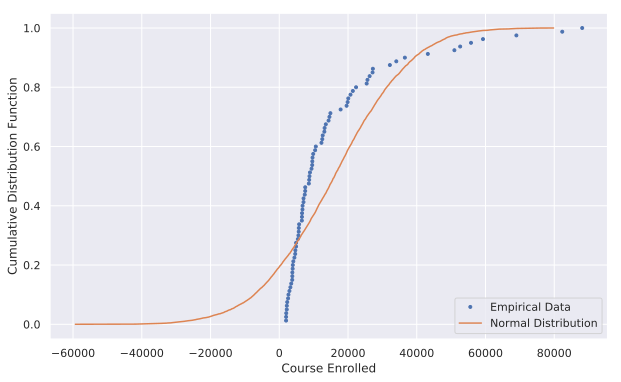

In [357]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(regression_data["course_enrolled"])

plt.figure(figsize=(10,6))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Course Enrolled")
plt.ylabel("Cumulative Distribution Function")

samples = np.random.normal(np.mean(regression_data["course_enrolled"]), np.std(regression_data["course_enrolled"]), size=10000)
x_theor, y_theor = ecdf(samples)
plt.plot(x_theor, y_theor)
plt.legend(('Empirical Data', 'Normal Distribution'), loc='lower right')

print("Альфа = 1 - уровеь значимости(0,95). В данном случае альфа - 0.05")
print("Тест на Нормальное распределение:", stats.normaltest(regression_data["course_rating"]))
print("p-value представляет собой двустороннюю вероятность хи-квадрат распределения для проверки гипотезы. Если значение p меньше, чем наша альфа (значение значимости), мы можем отклонить гипотезу о том, что данные этого образца обычно распространяются.")
print("В данном случае мы вынуждены отклонить нулевую гипотезу о том что выборка записанных на курсы распределена нормально")

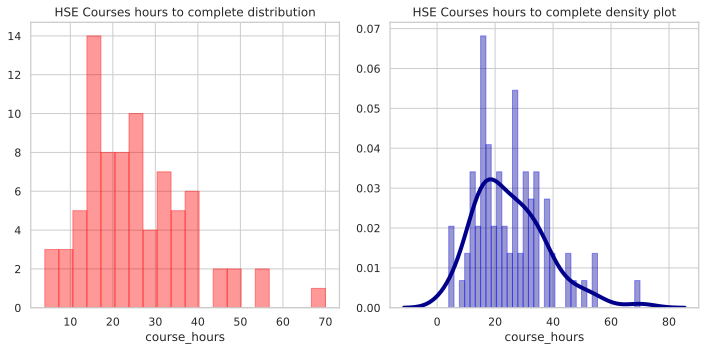

In [333]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plot1 = sns.distplot(regression_data['course_hours'], hist=True, kde=False, 
             bins=int(100/5), color = 'red',
             hist_kws={'edgecolor':'red'}, ax=axes[0])
plot1.set_title("HSE Courses hours to complete distribution")
plot2 = sns.distplot(regression_data['course_hours'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4}, ax=axes[1])
plot2.set_title("HSE Courses hours to complete density plot")

fig.tight_layout()

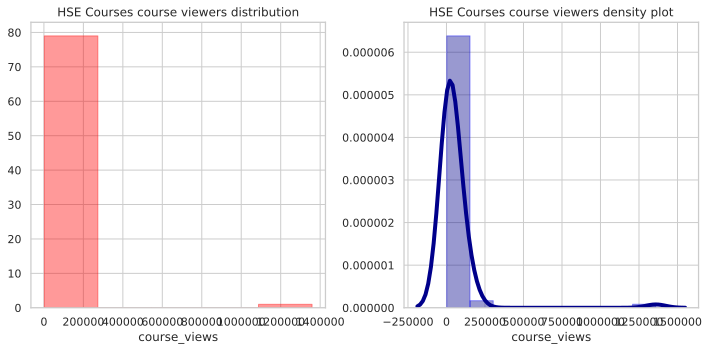

In [338]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plot1 = sns.distplot(regression_data['course_views'], hist=True, kde=False, 
             bins=int(100/20), color = 'red',
             hist_kws={'edgecolor':'red'}, ax=axes[0])
plot1.set_title("HSE Courses course viewers distribution")
plot2 = sns.distplot(regression_data['course_views'], hist=True, kde=True, 
             bins=int(180/20), color = 'darkblue', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4}, ax=axes[1])
plot2.set_title("HSE Courses course viewers density plot")

fig.tight_layout()

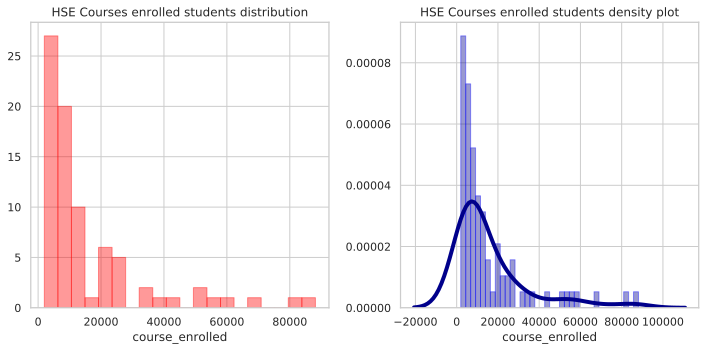

In [335]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plot1 = sns.distplot(regression_data['course_enrolled'], hist=True, kde=False, 
             bins=int(100/5), color = 'red',
             hist_kws={'edgecolor':'red'}, ax=axes[0])
plot1.set_title("HSE Courses enrolled students distribution")
plot2 = sns.distplot(regression_data['course_enrolled'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4}, ax=axes[1])
plot2.set_title("HSE Courses enrolled students density plot")

fig.tight_layout()

Теперь давайте посмотрим не связаны ли между собой какие-либо атрибуты. Сделать это можно рассчитав коэффициенты корреляции для всех столбцов. 

In [156]:
regression_data.corr()

,course_name_length,course_rating,course_enrolled,rating,reviews,course_views,course_hours,num_of_weeks,course_videos,course_teachers
course_name_length,1.000000,0.247958,-0.063089,-0.053881,-0.089035,-0.068781,-0.166379,0.001391,-0.067305,0.038711
course_rating,0.247958,1.000000,0.082500,0.155385,0.081401,0.005238,0.070467,0.251331,0.153220,0.000092
course_enrolled,-0.063089,0.082500,1.000000,0.895277,0.913121,0.498449,0.429824,0.082921,0.009704,0.127276
rating,-0.053881,0.155385,0.895277,1.000000,0.971277,0.547026,0.299839,-0.024662,-0.072500,0.120451
reviews,-0.089035,0.081401,0.913121,0.971277,1.000000,0.600890,0.360883,-0.076200,-0.119808,0.141190
course_views,-0.068781,0.005238,0.498449,0.547026,0.600890,1.000000,0.423739,0.030760,0.007105,0.017586
course_hours,-0.166379,0.070467,0.429824,0.299839,0.360883,0.423739,1.000000,0.457190,0.381403,-0.051568
num_of_weeks,0.001391,0.251331,0.082921,-0.024662,-0.076200,0.030760,0.457190,1.000000,0.677126,-0.247957
course_videos,-0.067305,0.153220,0.009704,-0.072500,-0.119808,0.007105,0.381403,0.677126,1.000000,-0.095288
course_teachers,0.038711,0.000092,0.127276,0.120451,0.141190,0.017586,-0.051568,-0.247957,-0.095288,1.000000


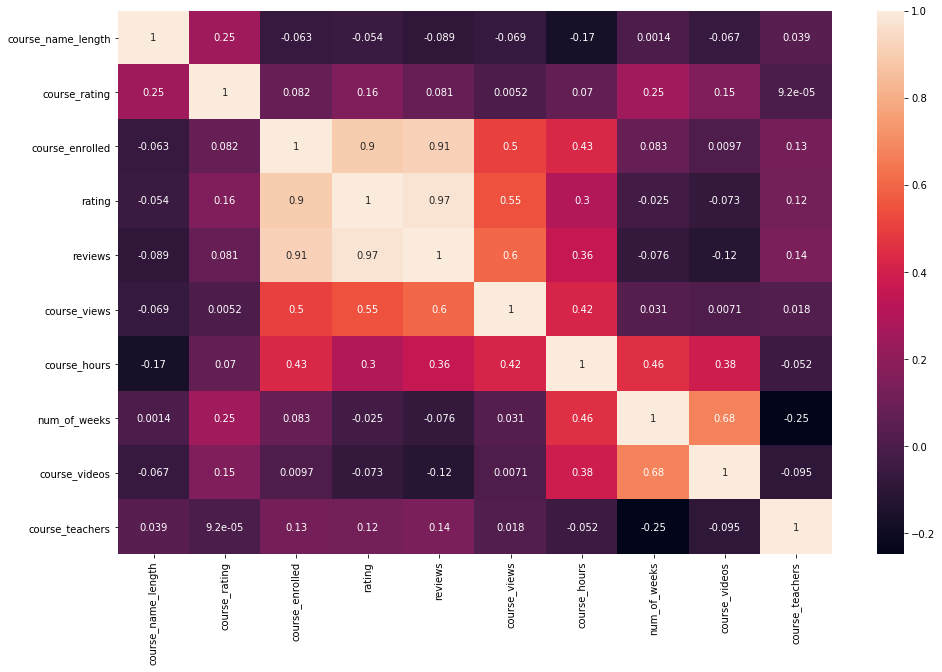

In [159]:
plt.figure(figsize = (16,10))
heatmap = sns.heatmap(regression_data.corr(),
                 cbar=True,
                 annot=True)

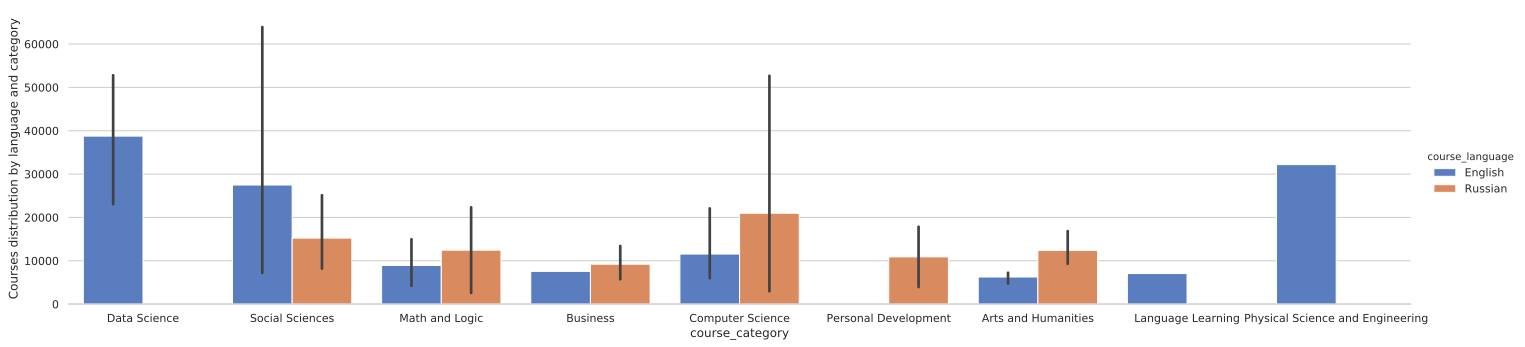

In [617]:
sns.set(style="whitegrid")

g = sns.catplot(x="course_category", y="course_enrolled", hue="course_language", data=ratings_data,
                aspect=4, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Courses distribution by language and category")

course_rating
3.8     3 
3.9     2 
4.1     2 
4.3     3 
4.4     4 
4.5     12
4.6     17
4.7     14
4.8     15
4.9     11
5       1 
None    7 
Name: course_rating, dtype: int64


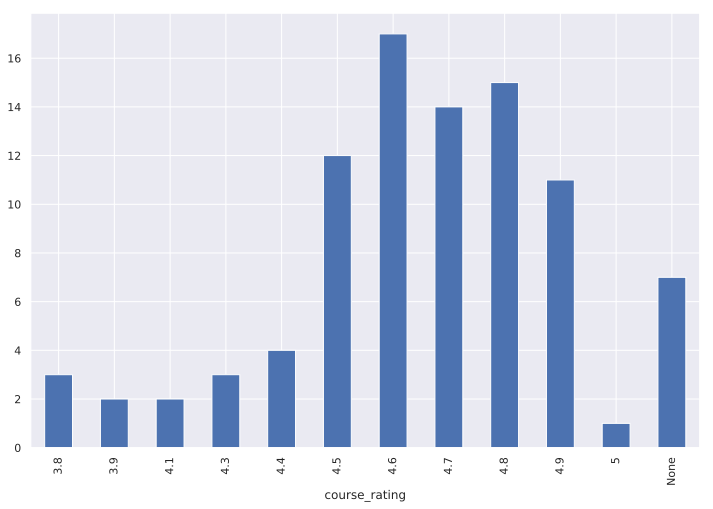

In [422]:
course_rating_count = courses.groupby('course_rating')['course_rating'].count()
print(course_rating_count)
bar_categories = course_rating_count.plot.bar(y='Distribution', figsize=(12, 8))

In [381]:
data_reg = regression_data[['course_name_length', 'course_rating']].sort_values(by=['course_rating'])
data_reg.head()

,course_name_length,course_rating
90,32,3.8
58,16,3.8
43,32,3.8
49,18,3.9
66,50,4.1


In [252]:
# Коэффициент корреляции Пирсона
corr, p = stats.pearsonr(data_reg['course_name_length'], data_reg['course_rating'])
print(corr, p)

0.24795810838690976 0.02657830633153504


IQR: 22.5


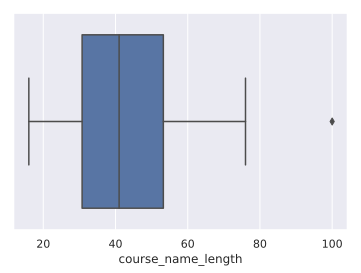

In [382]:
box = sns.boxplot(data_reg['course_name_length'])
Q1 = data_reg['course_name_length'].quantile(0.25)
Q3 = data_reg['course_name_length'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

In [383]:
filtered_without_outliers = data_reg['course_name_length'][~((data_reg['course_name_length'] < (Q1 - 1.5 * IQR)) |(data_reg['course_name_length'] > (Q3 + 1.5 * IQR)))]
filtered_without_outliers.shape
filtered_without_outliers.head()

90    32
58    16
43    32
49    18
66    50
Name: course_name_length, dtype: int64

In [384]:
X_train, X_test, y_train, y_test = train_test_split(data_reg[['course_name_length']], data_reg[['course_rating']], test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
slope = regressor.coef_[0]
intercept = regressor.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Slope: [0.0042018]
Intercept: [4.41152347]
Mean Absolute Error: 0.21070474085643215
Mean Squared Error: 0.07343647178865645
Root Mean Squared Error: 0.2709916452377387


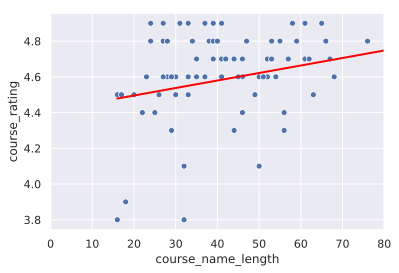

In [385]:
ax = sns.scatterplot(x=filtered_without_outliers, y='course_rating', data=data_reg)
x_vals = X_train
y_vals = intercept + slope * x_vals
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,80,y1,y2))
plt.plot(x_vals, y_vals, color='red', linewidth=2)

IQR: 4.0
Slope: [0.02148597]
Intercept: [4.42612304]
Mean Absolute Error: 0.1992705177183507
Mean Squared Error: 0.06824876955982426
Root Mean Squared Error: 0.2612446546052651
MSE train: 0.059
R^2 train: 0.055


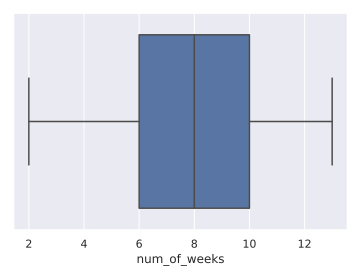

In [369]:
data_reg = regression_data[['num_of_weeks', 'course_rating']].sort_values(by=['course_rating'])
data_reg.head()

box = sns.boxplot(data_reg['num_of_weeks'])
Q1 = data_reg['num_of_weeks'].quantile(0.25)
Q3 = data_reg['num_of_weeks'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

filtered_without_outliers = data_reg['num_of_weeks'][~((data_reg['num_of_weeks'] < (Q1 - 1.5 * IQR)) |(data_reg['num_of_weeks'] > (Q3 + 1.5 * IQR)))]
filtered_without_outliers.shape
filtered_without_outliers.head()

X_train, X_test, y_train, y_test = train_test_split(data_reg[['num_of_weeks']], data_reg[['course_rating']], test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
slope = regressor.coef_[0]
intercept = regressor.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('MSE train: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred)))
print('R^2 train: {:.3f}'.format(
        r2_score(y_train, y_train_pred)))

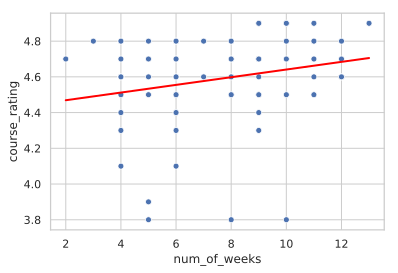

In [287]:
ax = sns.scatterplot(x=filtered_without_outliers, y='course_rating', data=data_reg)
x_vals = X_train
y_vals = intercept + slope * x_vals
plt.plot(x_vals, y_vals, color='red', linewidth=2)


IQR: 15100.25
Slope: [0.0040843]
Intercept: [-16.2115217]
Mean Absolute Error: 25.615331731341865
Mean Squared Error: 1496.6239147134709
Root Mean Squared Error: 38.68622383631505
MSE train: 883.582
R^2 train: 0.859


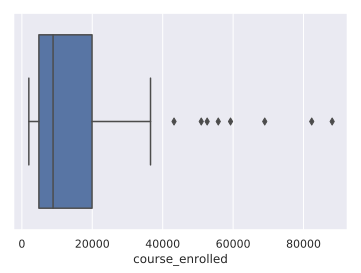

In [371]:
data_reg = regression_data[['course_enrolled', 'reviews']]
data_reg.head()

box = sns.boxplot(data_reg['course_enrolled'])
Q1 = data_reg['course_enrolled'].quantile(0.25)
Q3 = data_reg['course_enrolled'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

filtered_without_outliers = data_reg['course_enrolled'][~((data_reg['course_enrolled'] < (Q1 - 1.5 * IQR)) |(data_reg['course_enrolled'] > (Q3 + 1.5 * IQR)))]
filtered_without_outliers.shape
filtered_without_outliers.head()

X_train, X_test, y_train, y_test = train_test_split(data_reg[['course_enrolled']], data_reg[['reviews']], test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
slope = regressor.coef_[0]
intercept = regressor.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('MSE train: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred)))
print('R^2 train: {:.3f}'.format(
        r2_score(y_train, y_train_pred)))

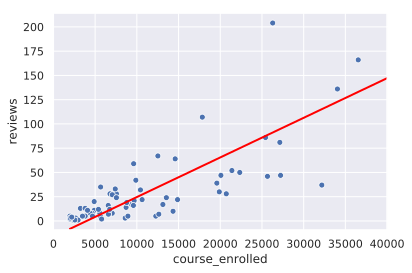

In [379]:
ax = sns.scatterplot(x=filtered_without_outliers, y='reviews', data=data_reg)
x_vals = X_train
y_vals = intercept + slope * x_vals
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,40000,y1,y2))
plt.plot(x_vals, y_vals, color='red', linewidth=2)

IQR: 42777.5
Slope: [0.05772926]
Intercept: [12743.54180622]
Mean Absolute Error: 10418.150774861897
Mean Squared Error: 323427534.30222034
Root Mean Squared Error: 17984.09114473735
MSE train: 227748393.700
R^2 train: 0.296


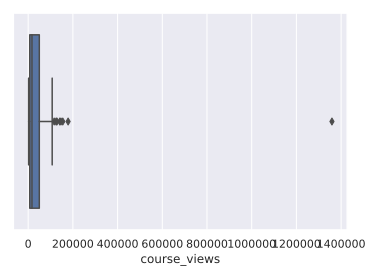

In [391]:
data_reg = regression_data[['course_views', 'course_enrolled']]
data_reg.head()

box = sns.boxplot(data_reg['course_views'])
Q1 = data_reg['course_views'].quantile(0.25)
Q3 = data_reg['course_views'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)

filtered_without_outliers = data_reg['course_views'][~((data_reg['course_views'] < (Q1 - 1.5 * IQR)) |(data_reg['course_views'] > (Q3 + 1.5 * IQR)))]
filtered_without_outliers.shape
filtered_without_outliers.head()

X_train, X_test, y_train, y_test = train_test_split(data_reg[['course_views']], data_reg[['course_enrolled']], test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)
slope = regressor.coef_[0]
intercept = regressor.intercept_
print(f'Slope: {slope}')
print(f'Intercept: {intercept}')

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

regressor.fit(X_train, y_train)
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

print('MSE train: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred)))
print('R^2 train: {:.3f}'.format(
        r2_score(y_train, y_train_pred)))

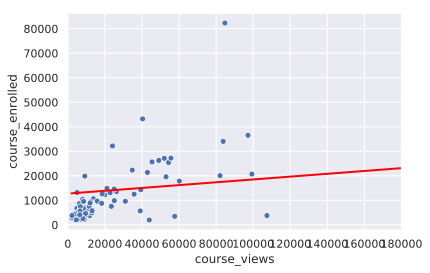

In [392]:
ax = sns.scatterplot(x=filtered_without_outliers, y='course_enrolled', data=data_reg)
x_vals = X_train
y_vals = intercept + slope * x_vals
x1,x2,y1,y2 = plt.axis() 
plt.axis((0,180000,y1,y2))
plt.plot(x_vals, y_vals, color='red', linewidth=2)

In [526]:
# Multiple Regession Model

X = regression_data[['course_name_length', 'course_enrolled', 'rating', 'reviews', 'course_views', 'course_hours', 'num_of_weeks', 'course_videos', 'course_teachers']]
Y = regression_data[['course_rating']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)

regressor = LinearRegression()
regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

coef = regressor.coef_
intercept = regressor.intercept_
print(f'Coefficients: {coef}')
print(f'Intercept: {intercept}')

df = pd.DataFrame({'Actual': [y_test.values], 'Predicted': [y_pred]})
df

Mean Absolute Error: 0.17481356215155827
Mean Squared Error: 0.061780578850038854
Root Mean Squared Error: 0.2485569931626122
Coefficients: [[ 3.15005076e-03 -8.53636799e-06  1.00711721e-03 -2.42724321e-03
  -3.38253071e-08  5.01964867e-04  3.74118823e-02 -1.41351587e-03
   1.98333672e-02]]
Intercept: [4.24194947]


,Actual,Predicted
0,"[[4.7], [4.7], [4.9], [4.9], [4.6], [4.8], [4.6], [4.6], [4.7], [4.6], [4.4], [4.9], [4.6], [4.8], [4.6], [4.3], [4.9], [4.5], [4.4], [3.8], [4.9], [4.6], [4.7], [4.6]]","[[4.7736625915646425], [4.633706643950984], [5.346928466067581], [4.7699055482453545], [4.594943299804797], [4.802662229254161], [4.6759444439821385], [4.563952208878182], [4.685513785466371], [4.533038332310917], [4.522556918923841], [4.791851029136705], [5.003711887663606], [4.485048547666036], [4.808290471403717], [4.558101279757781], [4.591410266220886], [4.618982438281333], [4.58832808105479], [4.6039882319462295], [4.811080442345993], [4.735393235361368], [4.638354990479726], [4.44421968911784]]"


## Исследование видеозаписей курсов с Coursera

In [448]:
first = pd.read_csv("head_movement/results/head_data.csv")
first.head()
second = pd.read_csv("emotion_detection/results/emotions_data.csv")
second = second.dropna(axis=1)
merged = first.merge(second, on='video_id')
merged.to_csv("opencv_data.csv", index=False)

In [649]:
first = pd.read_csv("data/videos_data_extended.csv")
first.head()
second = pd.read_csv("data/opencv_data.csv")
second = second.dropna(axis=1)
third = first.merge(second, on='video_id')
fourth = pd.read_csv("data/videos_data_blinks.csv")
fourth = fourth.dropna(axis=1)
merged = third.merge(fourth, on='url')
merged.to_csv("data/videos_dataset_final.csv", index=False)

In [650]:
# Загрузим датасет видеозаписей из CSV файла

videos = pd.read_csv("data/videos_dataset_final.csv") 
print("Data Shape:", videos.shape)
print("Column types:", videos.dtypes, "\n")

regression_data_videos = videos.copy().replace(to_replace='None', value=np.nan).dropna()
regression_data_videos['course_rating'] = regression_data_videos['course_rating'].astype(float)

print("Filtered Null rows", regression_data_videos.shape)

regression_data_videos.head()

Data Shape: (276, 35)
Column types: video_id               int64  
course_url             object 
course_rating          object 
url                    object 
time                   int64  
gender                 object 
hair                   object 
hair_length            object 
glasses                int64  
tie                    int64  
clothes                object 
black_board_type       int64  
pic_in_pic_type        int64  
sitting_type           int64  
remote_control         int64  
crossed_hands          int64  
back_hands             int64  
hands_down             int64  
hands_activity         object 
shaved                 object 
watch                  int64  
unbutonned_shirt       int64  
pomade                 int64  
jewelry                int64  
hands_in_pocket        int64  
distance               float64
num_of_points          float64
normalized_distance    float64
Fearful                float64
Surprised              float64
Happy                  float64
Neu

,video_id,course_url,course_rating,url,time,gender,hair,hair_length,glasses,tie,clothes,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,hands_activity,shaved,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
0,1,https://www.coursera.org/learn/vospitat-detei-pravilno,4.8,https://www.coursera.org/lecture/vospitat-detei-pravilno/triada-yBSBH,529,woman,blonde,short,0,0,informal,0,0,0,1,1,0,0,medium,none,0,0,1,1,0,73.5,180.0,0.408333,12.37,4.31,1.74,67.92,0.0,8.40,51
1,2,https://www.coursera.org/learn/vospitat-detei-pravilno,4.8,https://www.coursera.org/lecture/vospitat-detei-pravilno/osobiennosti-matierinskogho-poviedieniia-NHbYo,533,woman,blonde,short,0,0,informal,0,0,0,1,1,0,0,medium,none,0,0,1,0,0,92.5,152.0,0.608553,3.56,5.72,0.33,69.39,0.0,21.00,33
2,3,https://www.coursera.org/learn/vospitat-detei-pravilno,4.8,https://www.coursera.org/lecture/vospitat-detei-pravilno/emotsional-noie-polie-siem-i-fYHVo,527,woman,blonde,short,0,0,informal,0,0,0,1,1,0,0,medium,none,0,0,1,0,1,90.5,239.0,0.378661,11.89,5.06,0.56,70.06,0.0,7.44,23
3,4,https://www.coursera.org/learn/neuroeconomics,4.7,https://www.coursera.org/lecture/neuroeconomics/neuroeconomics-as-a-multidisciplinary-field-LRRlW,986,man,brown,long,0,0,formal,0,0,0,1,1,0,0,medium,shaved,0,0,0,0,1,191.5,294.0,0.651361,36.72,8.83,0.00,17.67,0.0,29.44,3
4,5,https://www.coursera.org/learn/neuroeconomics,4.7,https://www.coursera.org/lecture/neuroeconomics/a-brief-intro-to-neuroanatomy-and-neurophysiology-TUtHh,615,man,brown,long,0,0,formal,0,0,0,1,1,0,1,low,shaved,0,0,0,0,0,179.0,266.0,0.672932,53.40,6.35,0.00,18.56,0.0,4.52,13


## Overall statistics from videos

In [651]:
regression_data_videos.describe()

,video_id,course_rating,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,138.468254,4.601190,595.575397,0.361111,0.170635,0.087302,0.059524,0.055556,0.833333,0.488095,0.027778,0.170635,0.138889,0.400794,0.178571,0.126984,0.023810,86.587302,121.123016,1.822725,26.088889,17.361190,5.752143,19.911786,2.030873,8.408294,13.515873
std,77.900712,0.256467,225.761073,0.481279,0.376938,0.282838,0.237073,0.229517,0.373420,0.500853,0.164663,0.376938,0.346519,0.491035,0.383755,0.333618,0.152759,54.357423,80.786502,4.876313,25.822060,22.834648,12.494801,23.167293,7.476180,14.056279,12.859482
min,1.000000,3.800000,110.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.750000,4.500000,437.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.500000,58.500000,0.485475,3.612500,0.220000,0.000000,1.922500,0.000000,0.107500,4.750000
50%,139.500000,4.600000,596.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,79.000000,127.000000,0.640179,17.910000,6.165000,0.610000,10.580000,0.000000,2.440000,10.000000
75%,205.250000,4.800000,747.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,110.125000,175.250000,1.056066,40.712500,25.880000,4.715000,31.105000,0.330000,8.960000,18.000000
max,272.000000,4.900000,1161.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,319.000000,313.000000,55.500000,99.360000,97.950000,85.820000,99.060000,64.390000,85.720000,76.000000


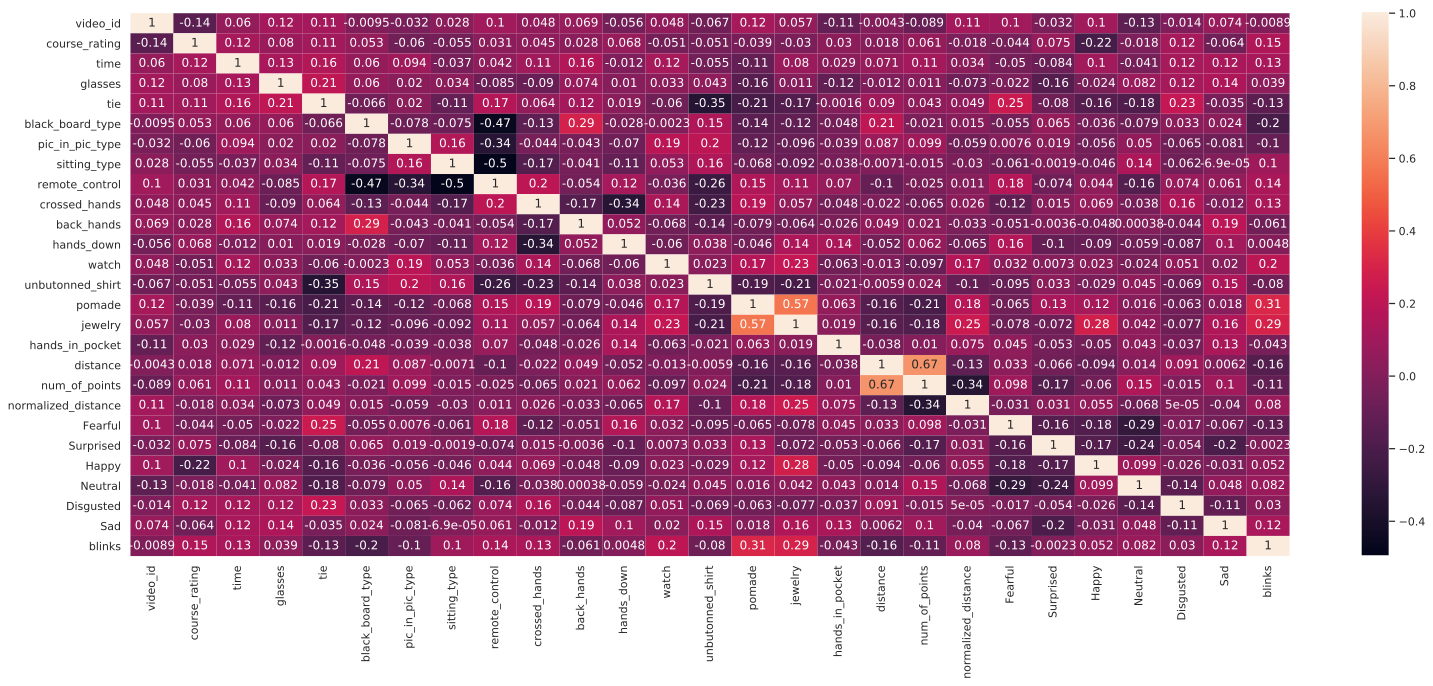

In [652]:
fig = plt.figure(figsize = (26,10))
heatmap = sns.heatmap(regression_data_videos.corr(),
                 cbar=True,
                 annot=True)
fig.savefig('CorrelationTableVideos.png')

gender
man      201
woman    75 
Name: gender, dtype: int64


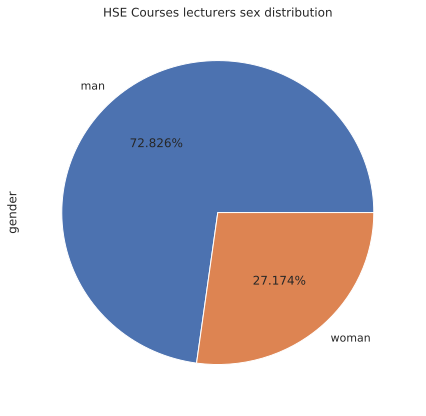

In [653]:
videos_gender = videos.groupby('gender')['gender'].count()
print(videos_gender)
plt.title("HSE Courses lecturers sex distribution")
pie_categories = videos_gender.plot.pie(y='Distribution', figsize=(7, 7), autopct='%.03f%%')
plt.show()

hair
black     139
blonde    25 
brown     55 
grey      47 
red       9  
Name: hair, dtype: int64


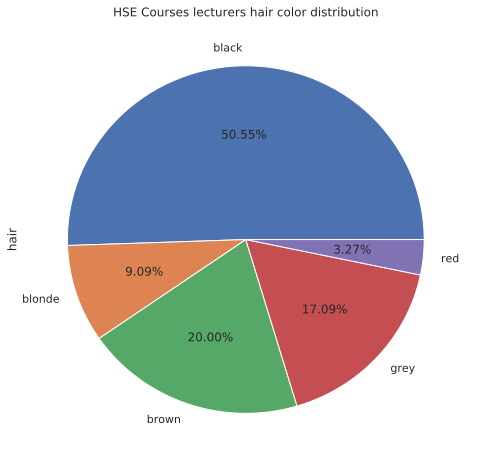

In [474]:
videos_hair = videos.groupby('hair')['hair'].count()
print(videos_hair)
plt.title("HSE Courses lecturers hair color distribution")
pie_categories = videos_hair.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.show()

hair
black     25
blonde    19
brown     25
red       6 
Name: hair, dtype: int64


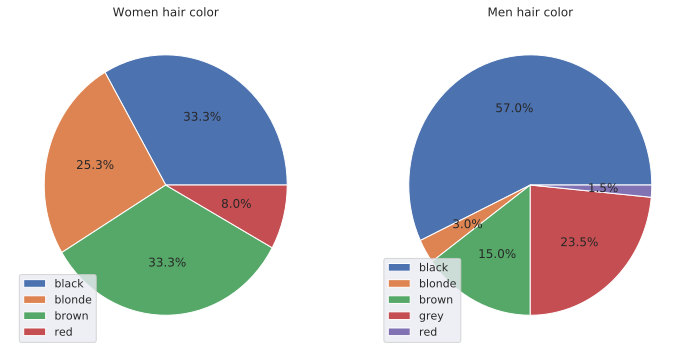

In [468]:
videos_hair_woman = videos.loc[videos['gender'] == 'woman'].groupby('hair')['hair'].count()
print(videos_hair_woman)
videos_hair_man = videos.loc[videos['gender'] == 'man'].groupby('hair')['hair'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_hair_woman, autopct='%.01f%%')
ax1.set_title("Women hair color")
ax1.legend(loc=3, labels=videos_hair_woman.index)
ax2.pie(videos_hair_man, autopct='%.01f%%')
ax2.set_title("Men hair color")
ax2.legend(loc=3, labels=videos_hair_man.index)

plt.show()

hair_length
hairless    14 
long        54 
short       207
Name: hair_length, dtype: int64


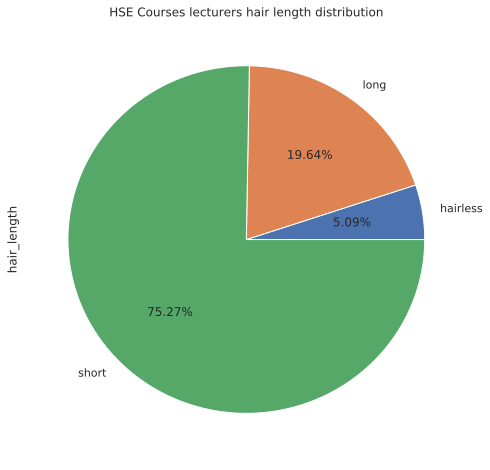

In [473]:
videos_hair_length = videos.groupby('hair_length')['hair_length'].count()
print(videos_hair_length)
plt.title("HSE Courses lecturers hair length distribution")
pie_categories = videos_hair_length.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.show()

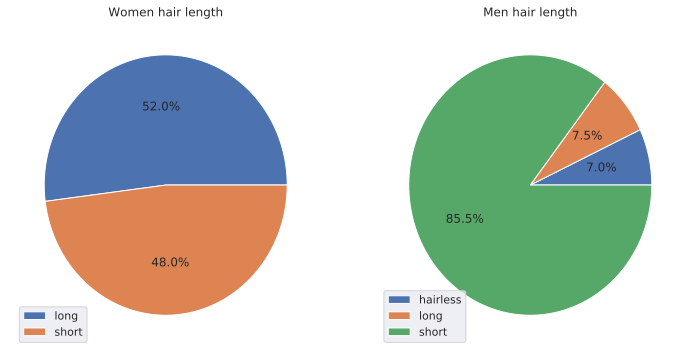

In [470]:
videos_hair_len_woman = videos.loc[videos['gender'] == 'woman'].groupby('hair_length')['hair_length'].count()
videos_hair_len_man = videos.loc[videos['gender'] == 'man'].groupby('hair_length')['hair_length'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_hair_len_woman, autopct='%.01f%%')
ax1.set_title("Women hair length")
ax1.legend(loc=3, labels=videos_hair_len_woman.index)
ax2.pie(videos_hair_len_man, autopct='%.01f%%')
ax2.set_title("Men hair length")
ax2.legend(loc=3, labels=videos_hair_len_man.index)

plt.show()

glasses
Not Wearing Glasses    175
Wearing Glasses        100
Name: glasses, dtype: int64


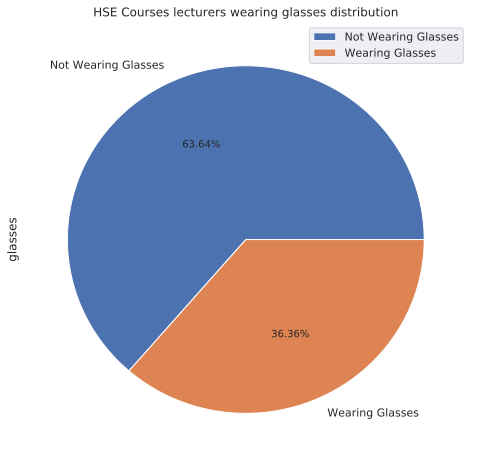

In [487]:
videos_glasses = videos.groupby('glasses')['glasses'].count()
videos_glasses.rename(index={0:'Not Wearing Glasses'},inplace=True)
videos_glasses.rename(index={1:'Wearing Glasses'},inplace=True)
print(videos_glasses)
plt.title("HSE Courses lecturers wearing glasses distribution")
pie_categories = videos_glasses.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=1, labels=videos_glasses.index)
plt.show()

hair_length
long     39
short    36
Name: hair_length, dtype: int64


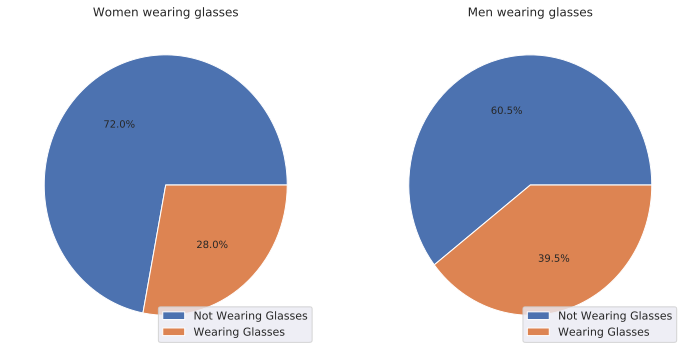

In [493]:
videos_glasses_woman = videos.loc[videos['gender'] == 'woman'].groupby('glasses')['glasses'].count()
videos_glasses_woman.rename(index={0:'Not Wearing Glasses'},inplace=True)
videos_glasses_woman.rename(index={1:'Wearing Glasses'},inplace=True)
print(videos_hair_woman)
videos_glasses_man = videos.loc[videos['gender'] == 'man'].groupby('glasses')['glasses'].count()
videos_glasses_man.rename(index={0:'Not Wearing Glasses'},inplace=True)
videos_glasses_man.rename(index={1:'Wearing Glasses'},inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_glasses_woman, autopct='%.01f%%')
ax1.set_title("Women wearing glasses")
ax1.legend(loc=4, labels=videos_glasses_woman.index)
ax2.pie(videos_glasses_man, autopct='%.01f%%')
ax2.set_title("Men wearing glasses")
ax2.legend(loc=4, labels=videos_glasses_man.index)

plt.show()

clothes
formal      207
informal    68 
Name: clothes, dtype: int64


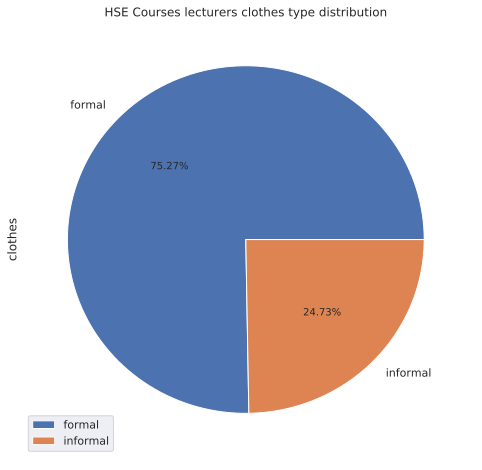

In [502]:
videos_formal_clothes = videos.groupby('clothes')['clothes'].count()
print(videos_formal_clothes)
plt.title("HSE Courses lecturers clothes type distribution")
pie_categories = videos_formal_clothes.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=3, labels=videos_formal_clothes.index)
plt.show()

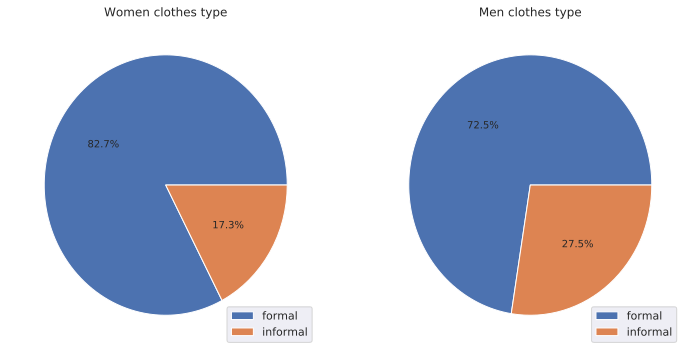

In [514]:
videos_clothes_woman = videos.loc[videos['gender'] == 'woman'].groupby('clothes')['clothes'].count()
videos_clothes_man = videos.loc[videos['gender'] == 'man'].groupby('clothes')['clothes'].count()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_clothes_woman, autopct='%.01f%%')
ax1.set_title("Women clothes type")
ax1.legend(loc=4, labels=videos_clothes_woman.index)
ax2.pie(videos_clothes_man, autopct='%.01f%%')
ax2.set_title("Men clothes type")
ax2.legend(loc=4, labels=videos_clothes_man.index)

plt.show()

unbutonned_shirt
Buttoned shirt      109
Unbuttoned shirt    98 
Name: unbutonned_shirt, dtype: int64


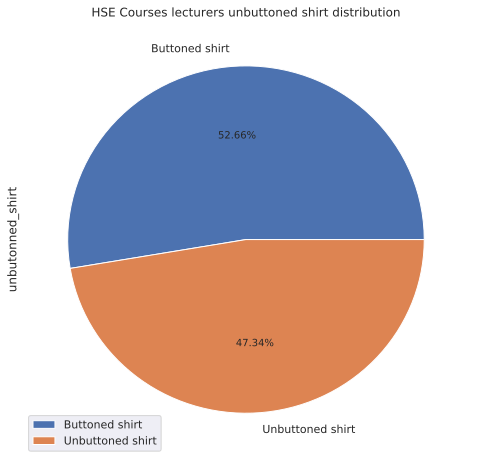

In [523]:
videos_formal_shirt = videos.loc[videos['clothes'] == 'formal'].groupby('unbutonned_shirt')['unbutonned_shirt'].count()
videos_formal_shirt.rename(index={0:'Buttoned shirt'},inplace=True)
videos_formal_shirt.rename(index={1:'Unbuttoned shirt'},inplace=True)
print(videos_formal_shirt)
plt.title("HSE Courses lecturers unbuttoned shirt distribution")
pie_categories = videos_formal_shirt.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=3, labels=videos_formal_shirt.index)
plt.show()

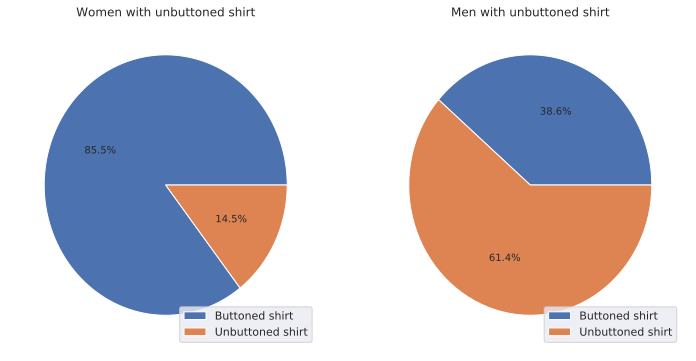

In [525]:
videos_formal_shirt_woman = videos.loc[(videos['gender'] == 'woman') & (videos['clothes'] == 'formal')].groupby('unbutonned_shirt')['unbutonned_shirt'].count()
videos_formal_shirt_woman.rename(index={0:'Buttoned shirt'},inplace=True)
videos_formal_shirt_woman.rename(index={1:'Unbuttoned shirt'},inplace=True)

videos_formal_shirt_man = videos.loc[(videos['gender'] == 'man') & (videos['clothes'] == 'formal')].groupby('unbutonned_shirt')['unbutonned_shirt'].count()
videos_formal_shirt_man.rename(index={0:'Buttoned shirt'},inplace=True)
videos_formal_shirt_man.rename(index={1:'Unbuttoned shirt'},inplace=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_formal_shirt_woman, autopct='%.01f%%')
ax1.set_title("Women with unbuttoned shirt")
ax1.legend(loc=4, labels=videos_formal_shirt_woman.index)
ax2.pie(videos_formal_shirt_man, autopct='%.01f%%')
ax2.set_title("Men with unbuttoned shirt")
ax2.legend(loc=4, labels=videos_formal_shirt_man.index)

plt.show()

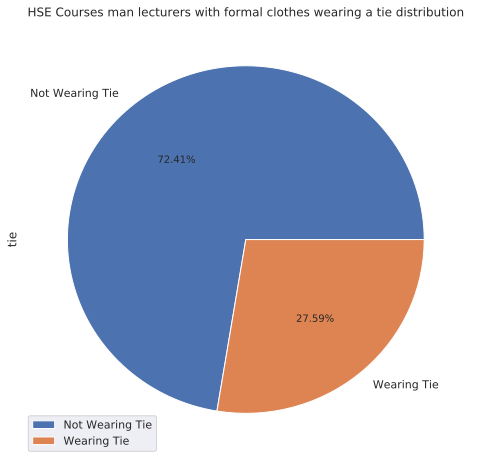

In [515]:
videos_men_tie = videos.loc[(videos['gender'] == 'man') & (videos['clothes'] == 'formal')].groupby('tie')['tie'].count()
videos_men_tie.rename(index={0:'Not Wearing Tie'},inplace=True)
videos_men_tie.rename(index={1:'Wearing Tie'},inplace=True)
videos_men_tie.head()
plt.title("HSE Courses man lecturers with formal clothes wearing a tie distribution")
pie_categories = videos_men_tie.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=3, labels=videos_men_tie.index)
plt.show()

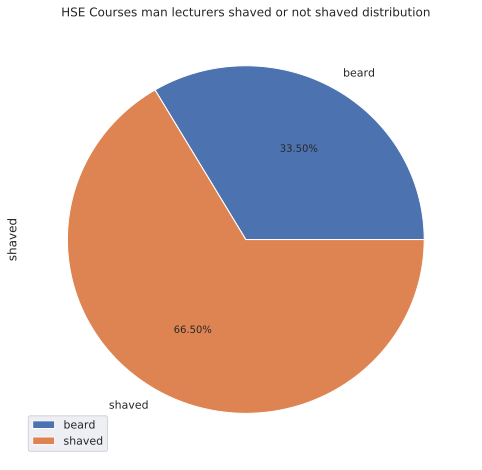

In [519]:
videos_men_shaved = videos.loc[videos['gender'] == 'man'].groupby('shaved')['shaved'].count()
videos_men_shaved.head()
plt.title("HSE Courses man lecturers shaved or not shaved distribution")
pie_categories = videos_men_shaved.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=3, labels=videos_men_shaved.index)
plt.show()

hair_length
long     39
short    36
Name: hair_length, dtype: int64


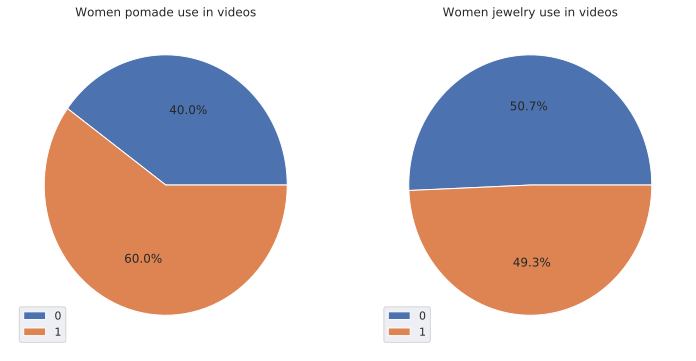

In [588]:
videos_pomade_woman = videos.loc[videos['gender'] == 'woman'].groupby('pomade')['pomade'].count()
print(videos_hair_woman)
videos_jewelry_woman = videos.loc[videos['gender'] == 'woman'].groupby('jewelry')['jewelry'].count()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_pomade_woman, autopct='%.01f%%')
ax1.set_title("Women pomade use in videos")
ax1.legend(loc=3, labels=videos_pomade_woman.index)
ax2.pie(videos_jewelry_woman, autopct='%.01f%%')
ax2.set_title("Women jewelry use in videos")
ax2.legend(loc=3, labels=videos_jewelry_woman.index)

plt.show()

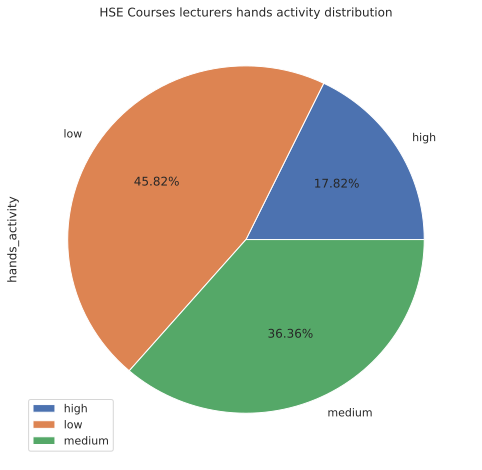

In [620]:
videos_hands_activity = videos.groupby('hands_activity')['hands_activity'].count()
videos_hands_activity.head()
plt.title("HSE Courses lecturers hands activity distribution")
pie_categories = videos_hands_activity.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=3, labels=videos_hands_activity.index)
plt.show()

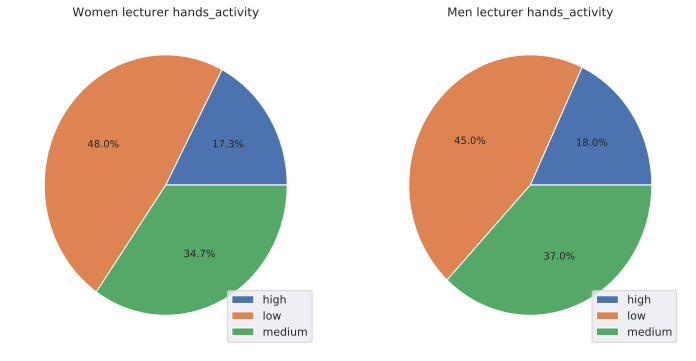

In [518]:
videos_hands_activ_woman = videos.loc[videos['gender'] == 'woman'].groupby('hands_activity')['hands_activity'].count()
videos_hands_activ_man = videos.loc[videos['gender'] == 'man'].groupby('hands_activity')['hands_activity'].count()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# plot each pie chart in a separate subplot
ax1.pie(videos_hands_activ_woman, autopct='%.01f%%')
ax1.set_title("Women lecturer hands_activity")
ax1.legend(loc=4, labels=videos_hands_activ_woman.index)
ax2.pie(videos_hands_activ_man, autopct='%.01f%%')
ax2.set_title("Men lecturer hands_activity")
ax2.legend(loc=4, labels=videos_hands_activ_man.index)

plt.show()

In [632]:
# Hand activity comparaison

videos_head_activity = videos[['normalized_distance', 'gender']]
man = videos_head_activity.loc[videos_head_activity['gender'] == 'man'].mean()
woman = videos_head_activity.loc[videos_head_activity['gender'] == 'woman'].mean()
print("Man: ", man, "\n")
print("Woman: ", woman, "\n")

Man:  normalized_distance    1.282048
dtype: float64 

Woman:  normalized_distance    2.899182
dtype: float64 



In [662]:
# Compare mean blinks between men and women

videos_blinks = videos[['blinks', 'gender']]
man = videos_blinks.loc[videos_blinks['gender'] == 'man'].mean()
woman = videos_blinks.loc[videos_blinks['gender'] == 'woman'].mean()
print("Man mean blinks: ", man, "\n")
print("Woman mean blinks: ", woman, "\n")

Man mean blinks:  blinks    9.965174
dtype: float64 

Woman mean blinks:  blinks    23.066667
dtype: float64 



## Определить какие курсы и видео получат выше рейтинг по статистике

In [656]:
great_ratings = videos.sort_values(by=['course_rating'], ascending=False).replace(to_replace='None', value=np.nan).dropna()[:75]
great_ratings.describe()

,video_id,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.00000,75.0,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000,75.000000
mean,128.453333,620.213333,0.400000,0.226667,0.093333,0.040000,0.026667,0.866667,0.480000,0.040000,0.146667,0.053333,0.346667,0.093333,0.08000,0.0,86.940000,126.880000,1.402889,26.572667,16.142133,5.019733,17.603333,4.176533,6.880000,14.626667
std,84.344418,185.632468,0.493197,0.421495,0.292858,0.197279,0.162192,0.342224,0.502964,0.197279,0.356156,0.226210,0.479113,0.292858,0.27312,0.0,40.204793,77.285879,2.449357,26.679211,24.229520,10.950493,23.096068,12.524093,11.997693,13.095051
min,1.000000,183.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,53.000000,486.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,63.500000,70.500000,0.526287,3.595000,0.060000,0.000000,0.655000,0.000000,0.030000,5.000000
50%,115.000000,633.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,87.500000,133.000000,0.625984,20.040000,1.740000,0.430000,7.220000,0.000000,1.320000,13.000000
75%,218.500000,733.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.0,111.750000,177.500000,1.042017,39.505000,27.760000,3.645000,24.795000,0.250000,7.515000,19.500000
max,269.000000,1029.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.0,199.000000,313.000000,13.875000,99.360000,79.120000,50.670000,82.450000,64.390000,57.500000,61.000000


In [657]:
low_ratings = videos.sort_values(by=['course_rating'], ascending=True).replace(to_replace='None', value=np.nan).dropna()[:20]
low_ratings.describe()

,video_id,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,20.000000,20.000000,20.000000,20.0,20.0,20.0,20.0,20.0,20.000000,20.0,20.000000,20.0,20.000000,20.000000,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,163.700000,523.300000,0.150000,0.0,0.0,0.0,0.0,1.0,0.400000,0.0,0.100000,0.0,0.500000,0.150000,0.100000,0.0,88.375000,118.000000,1.129173,31.785500,13.822500,15.087500,19.847000,0.955500,9.840500,6.050000
std,21.206007,253.663702,0.366348,0.0,0.0,0.0,0.0,0.0,0.502625,0.0,0.307794,0.0,0.512989,0.366348,0.307794,0.0,83.344857,91.723842,2.656301,23.257207,16.412471,21.366578,21.331922,1.885603,10.852731,6.878456
min,127.000000,110.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.750000,340.250000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,18.375000,1.500000,0.291262,11.217500,1.097500,0.655000,2.832500,0.000000,0.932500,1.000000
50%,168.500000,496.500000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.500000,0.000000,0.000000,0.0,71.250000,136.000000,0.538603,30.295000,6.280000,3.915000,8.895000,0.030000,5.300000,4.500000
75%,179.250000,710.750000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.0,112.875000,163.000000,0.745809,46.922500,24.545000,25.882500,36.267500,0.515000,14.912500,6.500000
max,196.000000,1021.000000,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,0.0,252.500000,309.000000,12.250000,69.760000,52.280000,81.850000,70.110000,5.860000,33.370000,28.000000


## Рейтинги для мужчин

In [658]:
great_ratings_men = videos.loc[videos['gender'] == 'man'].sort_values(by=['course_rating'], ascending=False).replace(to_replace='None', value=np.nan).dropna()[:50]
great_ratings_men.describe()

,video_id,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.0,50.0,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000,50.000000
mean,113.840000,613.500000,0.620000,0.30000,0.080000,0.020000,0.060000,0.880000,0.440000,0.020000,0.14000,0.060000,0.460000,0.0,0.0,0.0,91.230000,125.280000,1.219033,30.367400,16.804000,3.29740,17.470400,6.206200,7.758400,11.900000
std,84.188409,187.051041,0.490314,0.46291,0.274048,0.141421,0.239898,0.328261,0.501427,0.141421,0.35051,0.239898,0.503457,0.0,0.0,0.0,39.277949,69.795047,2.014323,28.698964,25.156666,6.17314,25.022844,14.974507,13.812645,8.393997
min,7.000000,183.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,45.250000,483.750000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,65.125000,71.000000,0.563778,8.560000,0.060000,0.01500,0.652500,0.000000,0.077500,6.250000
50%,107.500000,608.500000,1.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,90.000000,129.500000,0.717330,22.125000,1.815000,0.68500,6.330000,0.000000,1.325000,11.000000
75%,166.750000,724.750000,1.000000,1.00000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.0,0.0,0.0,112.250000,172.750000,1.009154,40.615000,33.282500,4.04250,23.327500,0.935000,5.460000,16.000000
max,269.000000,1029.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,0.0,0.0,0.0,199.000000,313.000000,12.250000,99.360000,79.120000,33.35000,97.130000,64.390000,57.500000,38.000000


In [659]:
low_ratings_men = videos.loc[videos['gender'] == 'man'].sort_values(by=['course_rating'], ascending=True).replace(to_replace='None', value=np.nan).dropna()[:17]
low_ratings_men.describe()

,video_id,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,17.000000,17.000000,17.000000,17.0,17.0,17.0,17.0,17.0,17.000000,17.0,17.000000,17.0,17.000000,17.0,17.0,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,165.941176,490.588235,0.176471,0.0,0.0,0.0,0.0,1.0,0.294118,0.0,0.117647,0.0,0.588235,0.0,0.0,0.0,90.352941,131.470588,0.508854,30.684118,12.501176,12.598824,23.187647,1.061176,10.853529,4.647059
std,22.322832,257.870864,0.392953,0.0,0.0,0.0,0.0,0.0,0.469668,0.0,0.332106,0.0,0.507300,0.0,0.0,0.0,81.375819,89.917405,0.376397,24.411263,16.892100,22.285614,21.472658,2.023697,11.509719,6.470521
min,127.000000,110.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,154.000000,332.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,55.500000,92.000000,0.388350,6.800000,0.910000,0.220000,4.630000,0.000000,0.250000,1.000000
50%,170.000000,438.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,72.000000,148.000000,0.518382,28.370000,4.720000,2.240000,17.020000,0.060000,6.090000,3.000000
75%,180.000000,701.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,110.500000,193.000000,0.641304,43.370000,21.870000,14.550000,36.410000,0.330000,16.000000,5.000000
max,196.000000,1021.000000,1.000000,0.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,0.0,0.0,252.500000,309.000000,1.219807,69.760000,52.280000,81.850000,70.110000,5.860000,33.370000,28.000000


## Рейтинги для женщин

In [660]:
great_ratings_women = videos.loc[videos['gender'] == 'woman'].sort_values(by=['course_rating'], ascending=False).replace(to_replace='None', value=np.nan).dropna()[:17]
great_ratings_women.describe()

,video_id,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,17.000000,17.000000,17.0,17.0,17.0,17.0,17.0,17.000000,17.000000,17.0,17.0,17.000000,17.0,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,148.176471,603.058824,0.0,0.0,0.0,0.0,0.0,0.882353,0.705882,0.0,0.0,0.058824,0.0,0.470588,0.352941,0.058824,68.323529,108.529412,2.362635,17.367647,18.864118,5.294118,25.098824,0.142941,4.574706,29.352941
std,88.591926,162.860166,0.0,0.0,0.0,0.0,0.0,0.332106,0.469668,0.0,0.0,0.242536,0.0,0.514496,0.492592,0.242536,39.326733,91.010382,3.716997,16.987705,25.662960,12.201590,30.394533,0.308094,6.046864,15.390505
min,1.000000,201.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
25%,89.000000,529.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,37.000000,9.000000,0.408333,1.890000,0.080000,0.000000,0.780000,0.000000,0.000000,19.000000
50%,143.000000,639.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,73.500000,132.000000,0.608553,12.370000,5.060000,0.330000,10.610000,0.000000,0.600000,23.000000
75%,227.000000,697.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.000000,92.500000,171.000000,1.761905,33.290000,30.440000,2.050000,60.480000,0.050000,7.440000,41.000000
max,240.000000,827.000000,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,152.000000,254.000000,13.875000,48.750000,63.930000,41.700000,77.040000,1.170000,21.000000,61.000000


In [661]:
low_ratings_women = videos.loc[videos['gender'] == 'woman'].sort_values(by=['course_rating'], ascending=True).replace(to_replace='None', value=np.nan).dropna()[:6]
low_ratings_women.describe()

,video_id,time,glasses,tie,black_board_type,pic_in_pic_type,sitting_type,remote_control,crossed_hands,back_hands,hands_down,watch,unbutonned_shirt,pomade,jewelry,hands_in_pocket,distance,num_of_points,normalized_distance,Fearful,Surprised,Happy,Neutral,Disgusted,Sad,blinks
count,6.000000,6.000000,6.0,6.0,6.0,6.0,6.000000,6.000000,6.000000,6.0,6.0,6.0,6.0,6.000000,6.000000,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000
mean,167.000000,757.833333,0.0,0.0,0.0,0.0,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.0,0.500000,0.333333,0.0,76.583333,96.500000,2.577842,41.200000,17.253333,14.710000,20.175000,0.178333,2.610000,13.666667
std,17.549929,107.359986,0.0,0.0,0.0,0.0,0.547723,0.547723,0.547723,0.0,0.0,0.0,0.0,0.547723,0.516398,0.0,73.051637,82.570576,4.771055,13.452317,10.294720,16.024209,21.293203,0.436826,1.916549,10.948364
min,150.000000,588.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,24.280000,6.060000,0.000000,0.000000,0.000000,0.340000,1.000000
25%,151.250000,700.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,33.750000,28.000000,0.473670,33.102500,8.555000,0.337500,0.792500,0.000000,0.990000,7.750000
50%,167.000000,778.500000,0.0,0.0,0.0,0.0,0.500000,0.500000,0.500000,0.0,0.0,0.0,0.0,0.500000,0.000000,0.0,62.500000,114.500000,0.531878,38.220000,16.295000,13.650000,18.865000,0.000000,2.790000,13.000000
75%,182.750000,842.750000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,0.750000,0.0,93.125000,132.000000,1.407242,52.682500,25.265000,27.210000,38.227500,0.000000,3.967500,15.250000
max,184.000000,864.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,207.000000,213.000000,12.250000,57.580000,30.640000,33.330000,43.870000,1.070000,4.990000,33.000000


In [589]:
emotions = videos[['Fearful', 'Surprised', 'Happy', 'Neutral', 'Disgusted', 'Sad']].groupby(videos['course_rating']).mean()
emotions

,Fearful,Surprised,Happy,Neutral,Disgusted,Sad
course_rating,,,,,,
3.8,29.096667,14.267778,21.917778,19.448889,1.123333,10.836667
3.9,38.026667,21.310000,29.190000,0.916667,0.356667,4.100000
4.0,19.390000,0.000000,0.000000,31.570000,0.593333,11.906667
4.1,40.318000,16.822000,3.384000,24.888000,1.230000,10.252000
4.3,35.324444,8.464444,8.070000,33.103333,0.000000,3.025556
4.4,32.710714,10.661429,2.384286,16.337857,0.614286,3.860000
4.5,18.767179,19.178462,4.130000,17.011282,1.012308,17.621795
4.6,26.302500,16.315000,7.622917,22.335625,1.594167,5.866250
4.7,26.851591,24.010682,3.280682,20.286591,1.246136,7.929091


Fearful      26.133273
Surprised    17.300436
Happy        5.634473 
Neutral      20.585855
Disgusted    1.883600 
Sad          8.335600 
dtype: float64


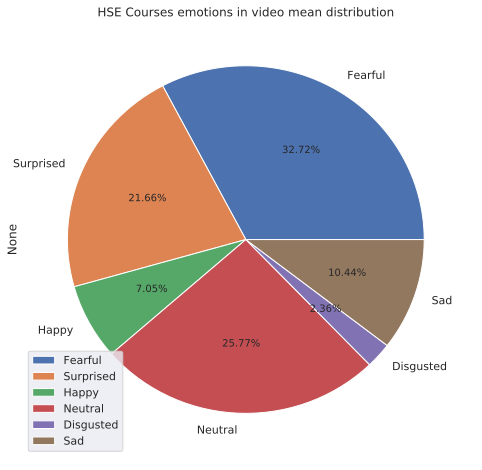

In [559]:
emotions = videos[['Fearful', 'Surprised', 'Happy', 'Neutral', 'Disgusted', 'Sad']].mean()
print(emotions)
plt.title("HSE Courses emotions in video mean distribution")
pie_categories = emotions.plot.pie(y='Distribution', figsize=(8, 8), autopct='%.02f%%')
plt.legend(loc=3, labels=emotions.index)
plt.show()

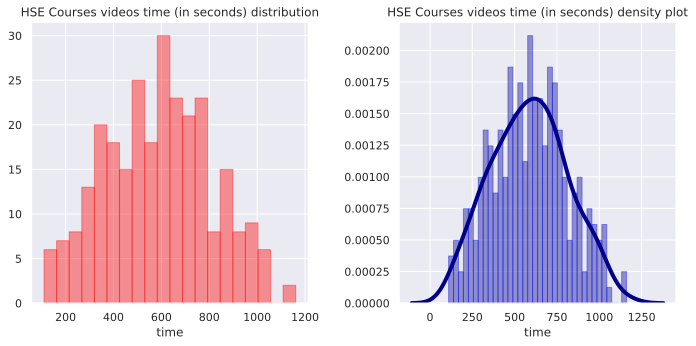

In [479]:
fig, axes = plt.subplots(1, 2, figsize=(10,5))
plot1 = sns.distplot(videos['time'], hist=True, kde=False, 
             bins=int(100/5), color = 'red',
             hist_kws={'edgecolor':'red'}, ax=axes[0])
plot1.set_title("HSE Courses videos time (in seconds) distribution")
plot2 = sns.distplot(videos['time'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'blue'},
             kde_kws={'linewidth': 4}, ax=axes[1])
plot2.set_title("HSE Courses videos time (in seconds) density plot")

fig.tight_layout()

Альфа = 1 - уровеь значимости(0,99). В данном случае альфа - 0.01
Тест на Нормальное распределение: NormaltestResult(statistic=6.797710762638176, pvalue=0.03341149149893635)
p-value представляет собой двустороннюю вероятность хи-квадрат распределения для проверки гипотезы. Если значение p меньше, чем наша альфа (значение значимости), мы можем отклонить гипотезу о том, что данные этого образца обычно распространяются.
В данном случае мы вынуждены принять нулевую гипотезу о том что выборка длительности видео курсов распределена нормально при уровне значимости 1%


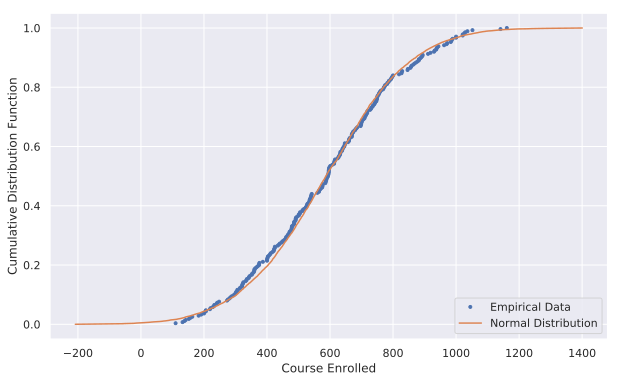

In [447]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x, y = ecdf(videos['time'])

plt.figure(figsize=(10,6))
sns.set()
plt.plot(x, y, marker=".", linestyle="none")
plt.xlabel("Course Enrolled")
plt.ylabel("Cumulative Distribution Function")

samples = np.random.normal(np.mean(videos['time']), np.std(videos['time']), size=10000)
x_theor, y_theor = ecdf(samples)
plt.plot(x_theor, y_theor)
plt.legend(('Empirical Data', 'Normal Distribution'), loc='lower right')

print("Альфа = 1 - уровеь значимости(0,99). В данном случае альфа - 0.01")
print("Тест на Нормальное распределение:", stats.normaltest(videos['time']))
print("p-value представляет собой двустороннюю вероятность хи-квадрат распределения для проверки гипотезы. Если значение p меньше, чем наша альфа (значение значимости), мы можем отклонить гипотезу о том, что данные этого образца обычно распространяются.")
print("В данном случае мы вынуждены принять нулевую гипотезу о том что выборка длительности видео курсов распределена нормально при уровне значимости 1%")